In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Confused student EEG brainwave data.

https://www.kaggle.com/datasets/wanghaohan/confused-eeg/data

Data:

Each subject watched a video showing college level class material they were familiar and unfamiliar with.  They then were asked to rate the video as confusing or not.  

While watching a time series of eeg readings were taken using an EEG sensor placed over the frontal lobe.  They used a 'MindSet' from Vandrico Inc (https://vandrico.com/wearables/device/mindset.html)

For each video 120 readings were taking over a minute, one per 0.5 seconds.




In [3]:
df = pd.read_csv("EEG_data.csv")
df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


### Exploring

In [4]:
def plotBrainwavesForUserAndVideo(subject_id, video_id):

    filtered_df = df.loc[( df["SubjectID"] == subject_id ) & ( df["VideoID"] == video_id )]

    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Plot Delta in the first subplot
    axes[0, 0].plot(filtered_df['Delta'], color='blue')
    axes[0, 0].set_title('Delta')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Amplitude')

    # Plot Alpha1 in the second subplot
    axes[0, 1].plot(filtered_df['Alpha1'], color='red')
    axes[0, 1].set_title('Alpha1')
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Amplitude')

    # Plot Beta1 in the third subplot (assuming Beta1 exists in the data)
    axes[1, 0].plot(filtered_df['Beta1'], color='green')
    axes[1, 0].set_title('Beta1')
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Amplitude')

    # Plot Gamma1 in the fourth subplot (assuming Gamma1 exists in the data)
    axes[1, 1].plot(filtered_df['Gamma1'], color='purple')
    axes[1, 1].set_title('Gamma1')
    axes[1, 1].set_xlabel('Time')
    axes[1, 1].set_ylabel('Amplitude')

    label = filtered_df["user-definedlabeln"].mean()
    fig.suptitle(f'Brainwave Activity for Subject {subject_id}, Video {video_id}, with user-definedlabeln = {label}', fontsize=16)

    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

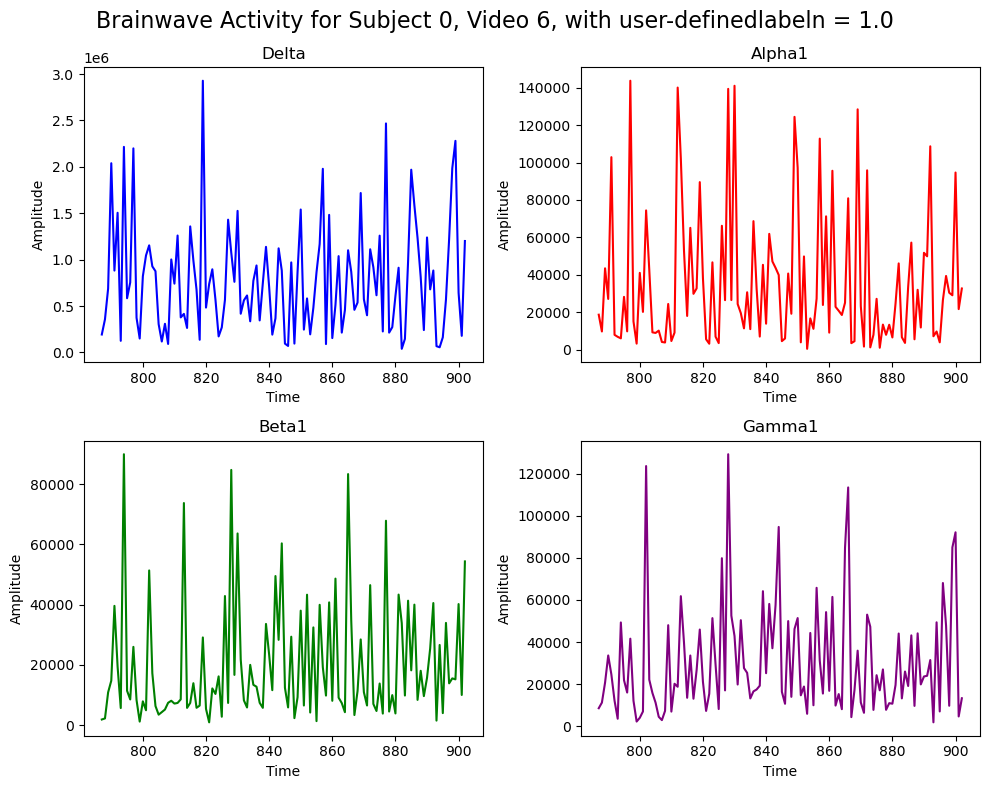

In [5]:
plotBrainwavesForUserAndVideo(0, 6)

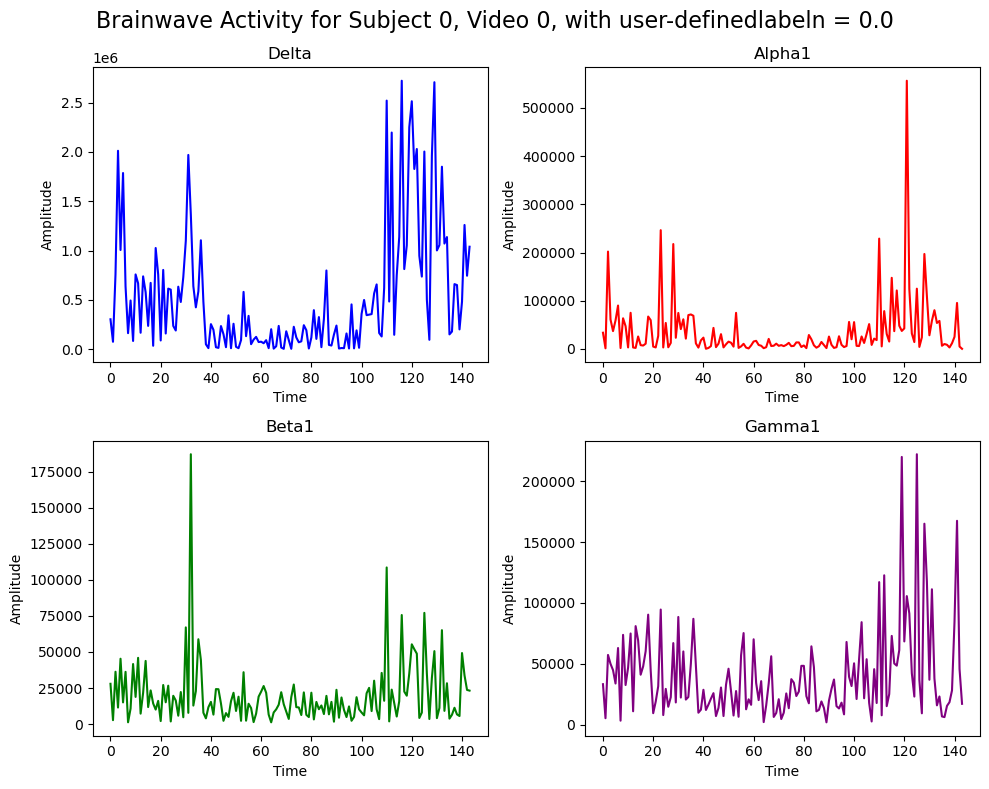

In [6]:
plotBrainwavesForUserAndVideo(0, 0)

### Correlation Heatmap

<Axes: >

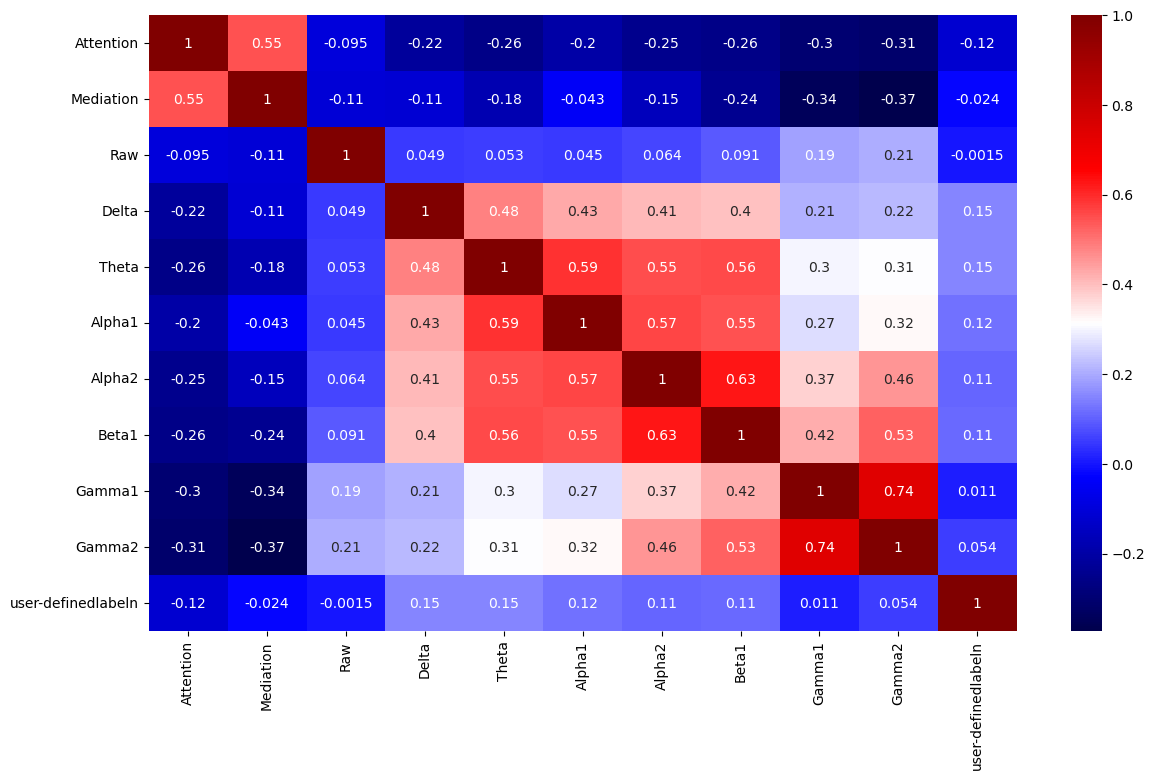

In [8]:
selected = df.loc[:, ["Attention","Mediation","Raw","Delta","Theta","Alpha1","Alpha2","Beta1", "Gamma1","Gamma2","user-definedlabeln"]]
selected.rename(columns={'user-definedlabeln': 'confusion_level'})

plt.figure(figsize=(14,8))
sns.heatmap(selected.corr(), cmap="seismic", annot=True)